# Curved Arc illustration
This notebook illustrates the effect of a source being distorted with a tangential and radial stretch and acurvature in the tangenetial direction.

In [6]:
from lenstronomy.Util import util
from lenstronomy.LightModel.light_model import LightModel
from lenstronomy.LensModel.lens_model import LensModel
from lenstronomy.LensModel.Solver.lens_equation_solver import LensEquationSolver
from lenstronomy.Plots import lens_plot

import numpy as np
import copy
import matplotlib.pyplot as plt
%matplotlib inline

cmap = plt.get_cmap('gist_heat')
cmap.set_bad(color='k', alpha=1.)
cmap.set_under('k')

# matplotlib configs
from pylab import rc
rc('axes', linewidth=2)
rc('xtick',labelsize=15)
rc('ytick',labelsize=15)


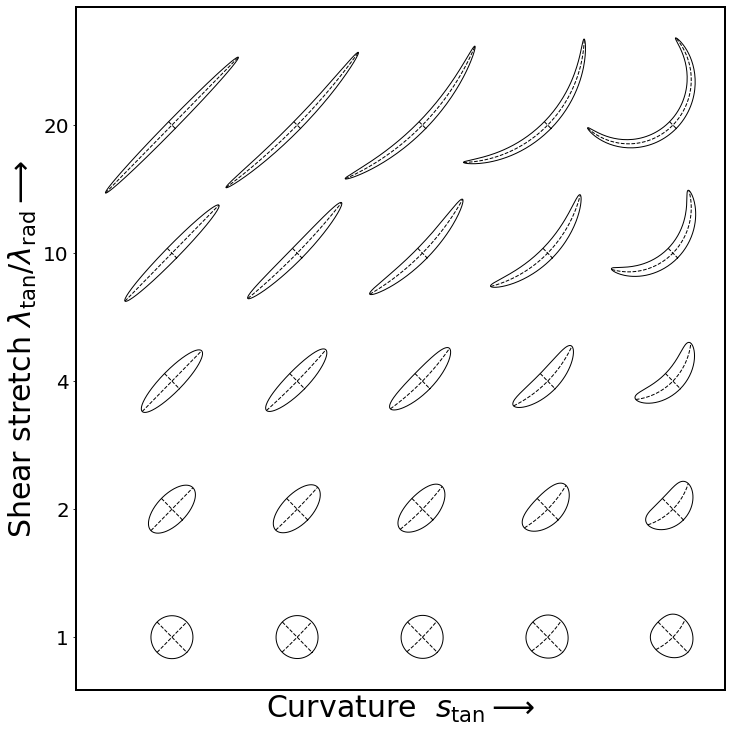

In [2]:
tangential_stretch_list = [1, 2, 4, 10, 20]
tang_max = np.max(tangential_stretch_list)
r_curvature_list = [100, 5, 2, 1, 0.5]
curvature_list = [0.00001, 0.2, 0.5, 1, 2]


f, ax = plt.subplots(1, 1, figsize=(10, 10))

for i in range(len(tangential_stretch_list)):

    for j in range(len(r_curvature_list)):
        center_x = j
        center_y = i
        stretch_scale = np.sqrt(tangential_stretch_list[i]/tang_max)*1.5/2
        kwargs_lens_ij = {'tangential_stretch': stretch_scale, 'radial_stretch':1./tangential_stretch_list[i] * stretch_scale, 
                        'curvature': curvature_list[j], 'direction': -np.pi/4, 'center_x': center_x, 'center_y': center_y}
        #plot_arc(ax, kwargs_lens_ij, kwargs_source, x, y)
        lens_plot.plot_arc(ax, stretch_scale=1, with_centroid=False, **kwargs_lens_ij)
        
    # replace thicks
        
    # add axis labels
#ax.set_xlabel(r'Curvature radius $\frac{r_{\rm s}}{\sqrt{\lambda_{\rm t} \lambda_{\rm s}}} \longrightarrow$', fontsize=30)    
ax.set_xlabel(r'Curvature  $s_{\rm tan} \longrightarrow$', fontsize=30)
ax.set_ylabel(r'Shear stretch $\lambda_{\rm tan} / \lambda_{\rm rad} \longrightarrow$', fontsize=30)
#ax.get_xaxis().set_visible(False)
ax.set_xticks([])
#ax.set_xticklabels([], fontsize=20)

ax.set_yticks([0, 1, 2, 3, 4])
ax.set_yticklabels(tangential_stretch_list, fontsize=20)


plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=1.0)

#plt.savefig('/Users/sibirrer/Science/Publications/ArcPhenomenology/AAS/figures/curved_arc_illustration.pdf', format='pdf', dpi=None, facecolor='w', edgecolor='w',
#        orientation='portrait', papertype=None, transparent=False, bbox_inches=None, pad_inches=0.1, frameon=None, metadata=None)       
plt.show()    

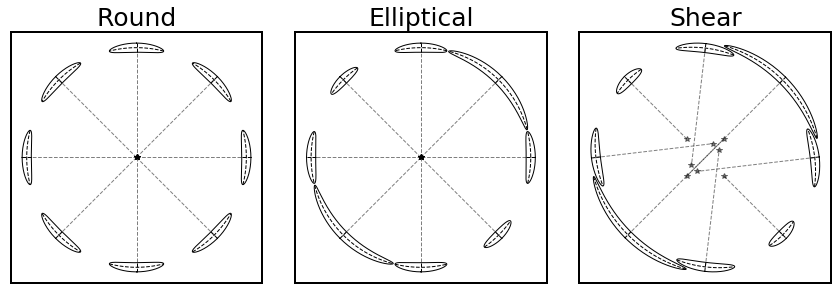

In [3]:


lens_model_class = LensModel(lens_model_list=['PEMD', 'SHEAR'])
from lenstronomy.LensModel.lens_model_extensions import LensModelExtensions
lens_model_ext = LensModelExtensions(lens_model_class)

# make points on circle
x_image, y_image = util.points_on_circle(radius=1.2, num_points=8, connect_ends=False)
#x_image, y_image = util.make_grid(numPix=6, deltapix=0.7)
#x_image = [0, 1.2, 0, -0.8]
#y_image = [0.8, 0, -1.2, 0]


def illustrate_model(ax, x_image, y_image, kwargs_lens, lens_model_ext, with_centroid=True, stretch_scale=0.05, color='k'):
    lens_model_list_arcs = []
    kwargs_lens_arcs = []
    tan_list = []
    rad_list = []

    for i in range(len(x_image)):
        lens_model_list_arcs.append('CURVED_ARC_SIS_MST')
        kwargs_arc_i = lens_model_ext.curved_arc_estimate(x_image[i], y_image[i], kwargs_lens)
        kwargs_lens_arcs.append(kwargs_arc_i)
        tan_list.append(kwargs_arc_i['tangential_stretch'])
        rad_list.append(kwargs_arc_i['radial_stretch'])

    lens_model_arcs = LensModel(lens_model_list=lens_model_list_arcs)
    lens_plot.curved_arc_illustration(ax, lens_model_arcs, kwargs_lens_arcs, 
                                      with_centroid=with_centroid, stretch_scale=stretch_scale,
                                      color=color)
    return np.array(tan_list), np.array(rad_list)

    
f, axes = plt.subplots(1, 3, figsize=(12, 4))
# round
kwargs_lens_spherical = [{'theta_E': 1., 'gamma': 2, 'e1': 0, 'e2': 0, 'center_x': 0., 'center_y': 0.},
                         {'gamma1': 0, 'gamma2': 0}]
ax=axes[0]
illustrate_model(ax, x_image, y_image, kwargs_lens_spherical, lens_model_ext)
ax.set_title("Round", fontsize=25)


# ellipticity
ax=axes[1]
kwargs_lens_ell = [{'theta_E': 1, 'gamma': 2, 'e1': 0.0, 'e2': 0.1, 'center_x': 0, 'center_y': 0},
                   {'gamma1': 0., 'gamma2': 0}]
ax.set_title("Elliptical", fontsize=25)

illustrate_model(ax, x_image, y_image, kwargs_lens_ell, lens_model_ext)

# shear
ax=axes[2]
kwargs_lens_shear = [{'theta_E': 1, 'gamma': 2, 'e1': 0, 'e2': 0, 'center_x': 0, 'center_y': 0},
                    {'gamma1': 0., 'gamma2': -0.1}]

illustrate_model(ax, x_image, y_image, kwargs_lens_shear, lens_model_ext)
ax.set_title("Shear", fontsize=25)

plt.tight_layout()
#plt.savefig('/Users/sibirrer/Science/Publications/ArcPhenomenology/azimuthal_constraints.pdf', format='pdf', dpi=None, facecolor='w', edgecolor='w',
#        orientation='portrait', papertype=None, transparent=False, bbox_inches=None, pad_inches=0.1, frameon=None, metadata=None)    
plt.show()




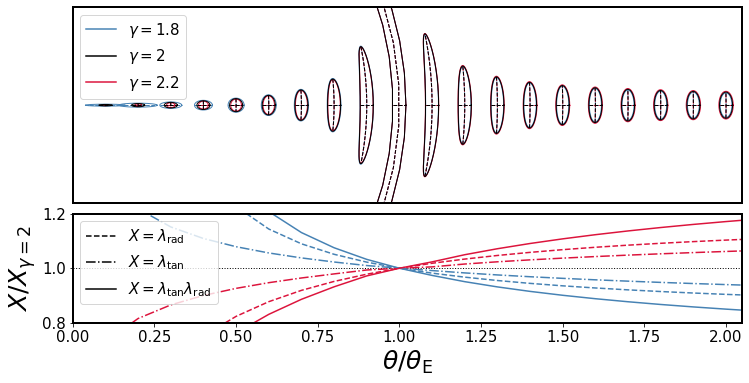

In [4]:
# power-law slope

# normalize to radial stretch at Einstein radius

x_image = np.linspace(0.1, 2.1, 21)
i_theta_E = 9  # index of Einstein radius
y_image = np.zeros_like(x_image)
gamma_list = [1.8, 2, 2.2]

stretch_scale = 0.02
color1, color2 = 'steelblue', 'crimson'

kwargs_lens_pl = [{'theta_E': 1, 'gamma': 2, 'e1': 0.0, 'e2': 0., 'center_x': 0, 'center_y': 0},
                    {'gamma1': 0.0, 'gamma2': 0.0}]

fig, axs = plt.subplots(2, 1, figsize=(12, 6), gridspec_kw={'height_ratios': [4, 2]}, sharex=True)

ax = axs[0]


kwargs_lens_pl[0]['gamma'] = gamma_list[0]

kwargs_arc_i = lens_model_ext.curved_arc_estimate(1, 0, kwargs_lens_pl)
radial_stretch = kwargs_arc_i['radial_stretch']
tan_list_gam_neg, rad_list_gam_neg = illustrate_model(ax, x_image, y_image, kwargs_lens_pl, lens_model_ext, with_centroid=False, 
                 stretch_scale=stretch_scale/radial_stretch, color=color1)
tan_list_gam_neg /= rad_list_gam_neg[i_theta_E]
rad_list_gam_neg /= rad_list_gam_neg[i_theta_E]
tan_list_gam_neg[i_theta_E] = 1



kwargs_lens_pl[0]['gamma'] = gamma_list[2]

kwargs_arc_i = lens_model_ext.curved_arc_estimate(1, 0, kwargs_lens_pl)
radial_stretch = kwargs_arc_i['radial_stretch']
tan_list_gam_pos, rad_list_gam_pos = illustrate_model(ax, x_image, y_image, kwargs_lens_pl, lens_model_ext, with_centroid=False, 
                 stretch_scale=stretch_scale/radial_stretch, color=color2)

tan_list_gam_pos /= radial_stretch
rad_list_gam_pos /= radial_stretch
tan_list_gam_pos[i_theta_E] = 1



kwargs_lens_pl[0]['gamma'] = gamma_list[1]
kwargs_arc_i = lens_model_ext.curved_arc_estimate(1, 0, kwargs_lens_pl)
radial_stretch = kwargs_arc_i['radial_stretch']
tan_list_gam, rad_list_gam = illustrate_model(ax, x_image, y_image, kwargs_lens_pl, lens_model_ext, with_centroid=False, 
                 stretch_scale=stretch_scale/radial_stretch, color='k')
tan_list_gam /= radial_stretch
rad_list_gam /= radial_stretch
tan_list_gam[i_theta_E] = 1


axs[1].plot(x_image, tan_list_gam_neg / tan_list_gam, '-.', color=color1)
axs[1].plot(x_image, tan_list_gam_pos / tan_list_gam, '-.', color=color2)

axs[1].plot(x_image, np.abs(rad_list_gam_neg) / rad_list_gam, '--', color=color1)
axs[1].plot(x_image, np.abs(rad_list_gam_pos) / rad_list_gam, '--', color=color2)

axs[1].plot(x_image, np.abs(rad_list_gam_neg) * tan_list_gam_neg/ rad_list_gam / tan_list_gam, '-', color=color1)
axs[1].plot(x_image, np.abs(rad_list_gam_pos) * tan_list_gam_pos / rad_list_gam / tan_list_gam, '-', color=color2)
axs[1].set_ylim([0.8, 1.2])


ax.set_ylim([-0.3, 0.3])
ax.set_xlim([0, 2.05])



#plot legend


ax.plot(-10, -10, color=color1, label=r'$\gamma = 1.8$')
ax.plot(-10, -10, color='k', label=r'$\gamma = 2$')
ax.plot(-10, -10, color=color2, label=r'$\gamma = 2.2$')
ax.legend(fontsize=15)

# plot radial and tangential differential differences with gamma in second panel
fig.subplots_adjust(hspace=0)
axs[1].set_xlabel(r"$\theta / \theta_{\rm E}$", fontsize=25)
axs[1].set_ylabel(r"$X / X_{\gamma = 2}$", fontsize=25)
axs[1].hlines(y=1, xmin=0, xmax=3, linewidth=1, color='k', linestyle=':')

axs[1].plot(-10, -10, '--', color='k', label=r'$X = \lambda_{\rm rad}$')
axs[1].plot(-10, -10, '-.', color='k', label=r'$X = \lambda_{\rm tan}$')
axs[1].plot(-10, -10, '-', color='k', label=r'$X = \lambda_{\rm tan} \lambda_{\rm rad}$')
axs[1].legend(fontsize=15)

#plt.tight_layout()
#plt.savefig('/Users/sibirrer/Science/Publications/ArcPhenomenology/radial_constraints.pdf', format='pdf', dpi=None, facecolor='w', edgecolor='w',
#        orientation='portrait', papertype=None, transparent=False, bbox_inches=None, pad_inches=0.1, frameon=None, metadata=None)  

plt.show()

In [5]:
lensModel = LensModel(lens_model_list=['SPP'])
solver = LensEquationSolver(lensModel=lensModel)
ext = LensModelExtensions(lensModel=lensModel)




def position_ratio(delta_r_list, kwargs_lens):
    theta_E = kwargs_lens[0]['theta_E']

    lambda_rad, lambda_tan, orientation_angle, dlambda_tan_dtan, dlambda_tan_drad, dlambda_rad_drad, dlambda_rad_dtan, dphi_tan_dtan, dphi_tan_drad, dphi_rad_drad, dphi_rad_dtan = ext.radial_tangential_differentials(theta_E, 0, kwargs_lens)

    ratio_list = []
    mean_dist_list = []
    inner_list = []
    outer_list = []

    for delta_r in delta_r_list:
        x_image, y_image = solver.image_position_from_source(delta_r * theta_E, 0, kwargs_lens, min_distance=0.01* theta_E, search_window=4 * theta_E,
                                       precision_limit=10**(-10), num_iter_max=100, arrival_time_sort=True,
                                       initial_guess_cut=True, verbose=False, x_center=0, y_center=0, num_random=0,
                                       non_linear=False, magnification_limit=None)
        if len(x_image) == 2:
            outer = abs(np.max(np.abs(x_image)) - theta_E)
            inner = abs(np.min(np.abs(x_image)) - theta_E)
            ratio_list.append(outer / inner)
            mean_dist_list.append((outer + inner) / 2.)
            outer_list.append(outer)
            inner_list.append(inner)
    mean_dist_list = np.array(mean_dist_list)
    outer_list = np.array(outer_list)
    inner_list = np.array(inner_list)
    theory_curve_1 = 1. + mean_dist_list * dlambda_rad_drad / lambda_rad
    theory_curve_1 = (1. + 1./2 * dlambda_rad_drad / lambda_rad * inner_list) / (1 - 1./2 * dlambda_rad_drad / lambda_rad * outer_list)
    mean_dist_list = np.concatenate(([0], mean_dist_list))
    diff_list = inner_list - outer_list
    ratio_list = np.concatenate(([1], ratio_list))
    theory_curve_1 = np.concatenate(([1], theory_curve_1))
    #theory_curve_2 = np.concatenate(([1], theory_curve_2))
    return mean_dist_list / theta_E, ratio_list, theory_curve_1#, theory_curve_2
    



/Users/sibirrer/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:69: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


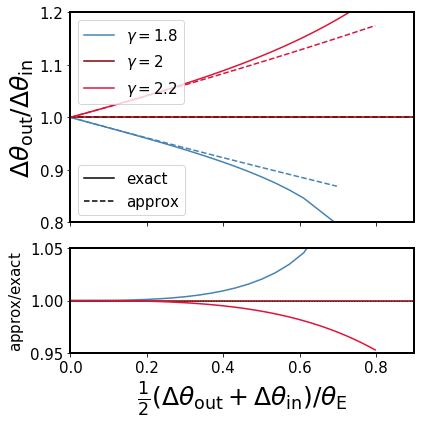

In [9]:
delta_r_list = np.linspace(start=0.01, stop=1, num=40)
theta_E = 1.

color1, color2, color3 = 'steelblue', 'crimson', 'maroon'


fig, axs = plt.subplots(2, 1, figsize=(6, 6), gridspec_kw={'height_ratios': [4, 2]}, sharex=True)

ax = axs[0]

gamma = 1.8
kwargs_lens = [{'theta_E': theta_E, 'gamma': gamma, 'center_x': 0, 'center_y': 0}]
mean_dist_list, ratio_list, theory_curve_1 = position_ratio(delta_r_list, kwargs_lens)

ax.plot(mean_dist_list, ratio_list, color=color1)
ax.plot(mean_dist_list, theory_curve_1, '--', color=color1)
axs[1].plot(mean_dist_list, theory_curve_1/ratio_list, color=color1)


gamma = 2
kwargs_lens = [{'theta_E': theta_E, 'gamma': gamma, 'center_x': 0, 'center_y': 0}]
mean_dist_list, ratio_list, theory_curve_1 = position_ratio(delta_r_list, kwargs_lens)

ax.plot(mean_dist_list, ratio_list, color=color3)
ax.plot(mean_dist_list, theory_curve_1, '--', color=color3)
axs[1].plot(mean_dist_list, theory_curve_1/ratio_list, color=color3)

gamma = 2.2
kwargs_lens = [{'theta_E': theta_E, 'gamma': gamma, 'center_x': 0, 'center_y': 0}]
mean_dist_list, ratio_list, theory_curve_1 = position_ratio(delta_r_list, kwargs_lens)

ax.plot(mean_dist_list, ratio_list, color=color2)
ax.plot(mean_dist_list, theory_curve_1, '--', color=color2)
axs[1].plot(mean_dist_list, theory_curve_1/ratio_list, color=color2)



ax.set_ylim([0.8, 1.2])
ax.set_xlim([0, 0.9])
axs[1].set_ylim([0.95, 1.05])

ax.set_ylabel(r"$\Delta\theta_{\rm out} / \Delta\theta_{\rm in}$", fontsize=25)

ax.plot(-10, -10, color=color1, label=r'$\gamma = 1.8$')
ax.plot(-10, -10, color=color3, label=r'$\gamma = 2$')
ax.plot(-10, -10, color=color2, label=r'$\gamma = 2.2$')
ax.legend(fontsize=15, loc='upper left')

# plot radial and tangential differential differences with gamma in second panel
fig.subplots_adjust(hspace=0.01)
axs[1].set_xlabel(r"$\frac{1}{2}(\Delta\theta_{\rm out} + \Delta\theta_{\rm in}) / \theta_{\rm E}}$", fontsize=25)
axs[1].set_ylabel(r"${\rm approx} / {\rm exact}$", fontsize=15)
axs[1].hlines(y=1, xmin=0, xmax=3, linewidth=1, color='k', linestyle=':')

#axs[1].plot(-10, -10, '--', color='k', label=r'$X = \lambda_{\rm rad}$')
#axs[1].plot(-10, -10, '-.', color='k', label=r'$X = \lambda_{\rm tan}$')
#axs[1].plot(-10, -10, '-', color='k', label=r'$X = \lambda_{\rm tan} \lambda_{\rm rad}$')
#axs[1].legend(fontsize=15)

ax2 = ax.twinx()
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ax2.plot(-10, -10, '-k', label='exact')
ax2.plot(-10, -10, '--k', label='approx')
ax2.legend(fontsize=15, loc='lower left')

plt.tight_layout()
#plt.savefig('/Users/sibirrer/Science/Publications/ArcPhenomenology/AAS/figures/radial_point_source.pdf', format='pdf', dpi=None, facecolor='w', edgecolor='w',
#        orientation='portrait', papertype=None, transparent=False, bbox_inches=None, pad_inches=0.1, frameon=None, metadata=None)   

plt.show()



/Users/sibirrer/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:90: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


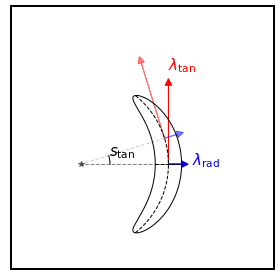

In [7]:
# curved arc with eigenvectors
from lenstronomy.LensModel.Profiles.curved_arc_spp import center_deflector

direction = 0
radial_stretch = 1
tangential_stretch = 6
curvature = 0.15
center_x, center_y = 0, 0
stretch_scale = 1

color1, color2 = 'steelblue', 'crimson'
color1, color2 = 'b', 'r'

kwargs_lens_ij = {'tangential_stretch': tangential_stretch, 'radial_stretch': radial_stretch, 
                  'curvature': curvature, 'direction': direction, 'center_x': center_x, 'center_y': center_y}

linewidth = 1

f, ax = plt.subplots(1, 1, figsize=(4, 4))
lens_plot.plot_arc(ax, stretch_scale=stretch_scale, with_centroid=True,linewidth=linewidth, **kwargs_lens_ij)


# plotting arrows at the location (0,0)

dx_r = np.cos(direction) * radial_stretch * stretch_scale
dy_r = np.sin(direction) * radial_stretch * stretch_scale

ax.arrow(center_x, center_y, dx_r, dy_r, alpha=1, width=0.01,
                  head_width=0.5, head_length=0.5, color=color1)

dx_t = -np.sin(direction) * tangential_stretch * stretch_scale
dy_t = np.cos(direction) * tangential_stretch * stretch_scale

ax.arrow(center_x, center_y, dx_t, dy_t, alpha=1, width=0.01,
                  head_width=0.5, head_length=0.5, color=color2)

ax.text(center_x + 1.8*dx_r, center_y + 1.8*dy_r, r"$\lambda_{\rm rad}$", fontsize=15, color=color1)
ax.text(center_x + 1.2*dx_t, center_y + 1.2*dy_t, r"$\lambda_{\rm tan}$", fontsize=15, color=color2)


# off-setting location in tangential direction

direction_ = direction + curvature * 2

curv_center_x, curv_center_y = center_deflector(curvature, direction, center_x, center_y)

center_x_ = np.cos(direction_) / curvature + curv_center_x
center_y_ = np.sin(direction_) / curvature + curv_center_y


dx_r = np.cos(direction_) * radial_stretch * stretch_scale
dy_r = np.sin(direction_) * radial_stretch * stretch_scale

ax.arrow(center_x_, center_y_, dx_r, dy_r, linestyle='-', alpha=0.5, width=0.01,
                  head_width=0.5, head_length=0.5, color=color1)

dx_t = -np.sin(direction_) * tangential_stretch * stretch_scale
dy_t = np.cos(direction_) * tangential_stretch * stretch_scale

ax.arrow(center_x_, center_y_, dx_t, dy_t, linestyle='-', alpha=0.5, width=0.01,
                  head_width=0.5, head_length=0.5, color=color2)

ax.plot([center_x_, curv_center_x], [center_y_, curv_center_y], 'k--', alpha=0.2, linewidth=linewidth)

# plot curvature angle

r = 1./curvature / 3 # we plot the angle at half the curvature radius

phi = np.linspace(start=direction, stop=direction_, num=10)
x_ = np.cos(phi) * r + curv_center_x
y_ = np.sin(phi) * r + curv_center_y
ax.plot(x_, y_, 'k-', linewidth=linewidth)
#ax.plot([x_[0], curv_center_x], [y_[0], curv_center_y], 'k-', linewidth=linewidth)
#ax.plot([x_[-1], curv_center_x], [y_[-1], curv_center_y], 'k-', linewidth=linewidth)
ax.text(x_[-1], y_[-1], r"$s_{\rm tan}$", fontsize=15, color='k')

ax.set_xlim([-12, 8])
ax.set_ylim([-8, 12])

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.autoscale(False)
# rectangular frame
#ax.axis('scaled')
f.tight_layout()

#plt.savefig('/Users/sibirrer/Science/Publications/ArcPhenomenology/AAS/figures/eigenvector_illustration.pdf', format='pdf', dpi=None, facecolor='w', edgecolor='w',
#        orientation='portrait', papertype=None, transparent=False, bbox_inches=None, pad_inches=0.1, frameon=None, metadata=None)   

f.show()
